In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [95]:
df=pd.read_table("data.txt",delimiter=",")

In [96]:
df= df.drop('row.names', axis='columns')

In [97]:
df['famhist'] = df['famhist'].map({'Present':1, 'Absent':0}) 
#df['famhist'] = df['famhist'].replace({'Present':1, 'Absent':0}) 
# df = pd.get_dummies(df, columns =['famhist'], dtype = int)

In [98]:
df.shape

(462, 10)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [100]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [101]:
df[36:37]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
36,140,3.9,7.32,25.05,0,47,27.36,36.77,32,0


In [102]:
df['chd'][2]

np.int64(0)

#### Question 1

nombre de variable: 10 

dimension 462x11

valeur réponse Y: chd

les covariables: sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age sont en type numeric et il n'y a pas des obs manquantes


In [103]:
X = df.drop('chd', axis = 1)

In [104]:
X

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [105]:
Y = df['chd']

In [106]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [107]:
X37 = X[36:37]

In [108]:
Y3 = Y[2]

In [109]:
Y3

np.int64(0)

max_depth = 1 -> Précision : 69.78%


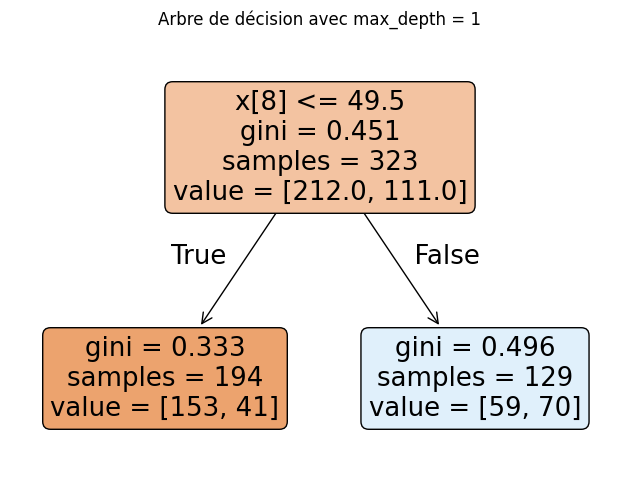

max_depth = 2 -> Précision : 65.47%


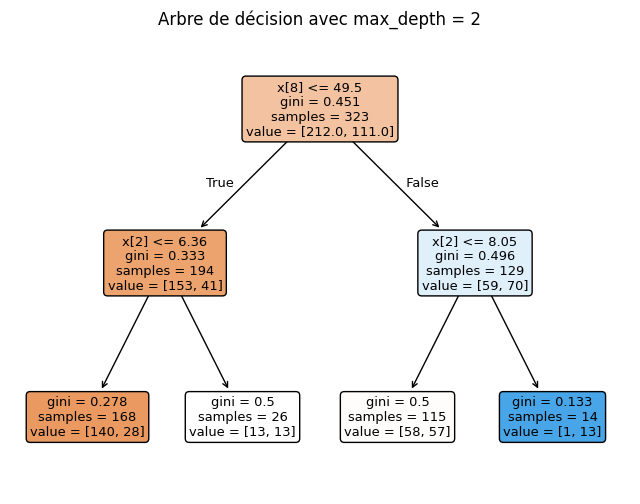

max_depth = 3 -> Précision : 61.15%


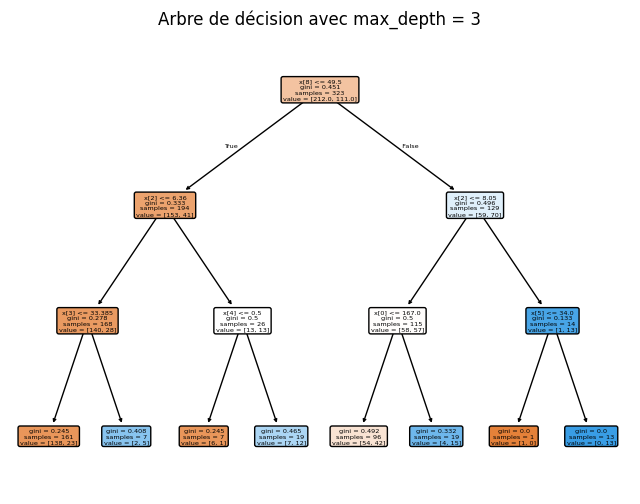

max_depth = 4 -> Précision : 66.91%


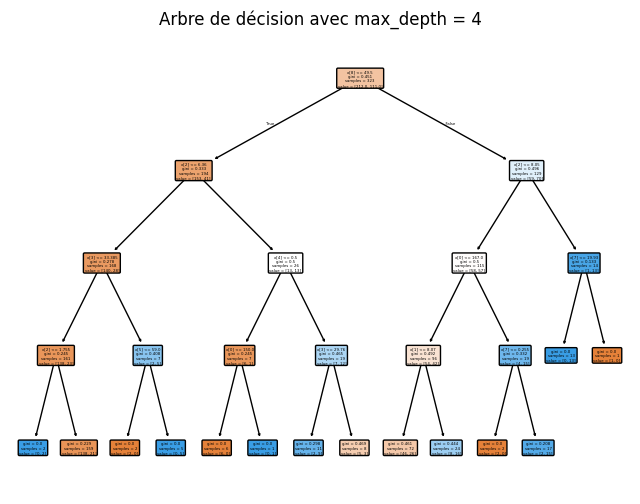

max_depth = 5 -> Précision : 61.87%


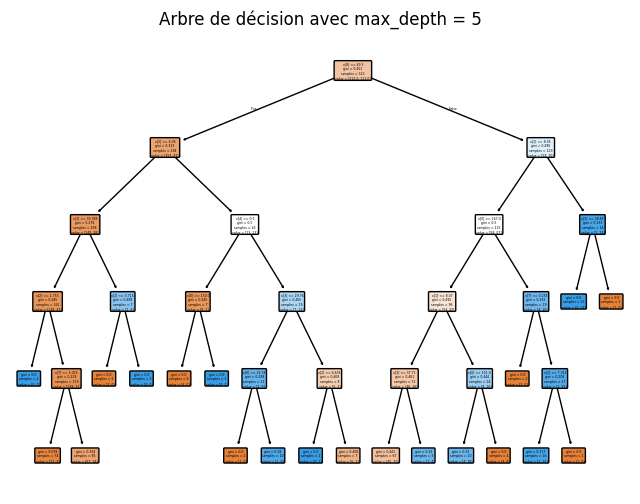

In [110]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Boucle sur max_depth allant de 1 à 5
for depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("max_depth =", depth, "-> Précision : {:.2f}%".format(acc * 100))

        # Visualisation de l'arbre pour la profondeur courante
    plt.figure(figsize=(8, 6))
    tree.plot_tree(clf,
                  filled=True,
                  rounded=True)
    plt.title("Arbre de décision avec max_depth = {}".format(depth))
    plt.show()



In [111]:
#question 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [112]:
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 0, random_state = 42)
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# print(f'Profondeur: {0}, Accuracy: {accuracy:4f}')

In [113]:

for lamda in range(1,6):
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth = lamda, random_state = 42)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)

    print(f'Profondeur: {lamda}, Accuracy: {accuracy:4f}')

Profondeur: 1, Accuracy: 0.625899
Profondeur: 2, Accuracy: 0.661871
Profondeur: 3, Accuracy: 0.719424
Profondeur: 4, Accuracy: 0.669065
Profondeur: 5, Accuracy: 0.697842


In [114]:
#question 3+4
risques = {}
for lamda in range(1,6):
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth = lamda, random_state = 42)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    risque = 1 - accuracy
    risques[lamda] = risque
    print(f'Profondeur: {lamda}, Accuracy: {accuracy:4f}, Risque: {risque:4f}')


Profondeur: 1, Accuracy: 0.625899, Risque: 0.374101
Profondeur: 2, Accuracy: 0.661871, Risque: 0.338129
Profondeur: 3, Accuracy: 0.719424, Risque: 0.280576
Profondeur: 4, Accuracy: 0.669065, Risque: 0.330935
Profondeur: 5, Accuracy: 0.697842, Risque: 0.302158


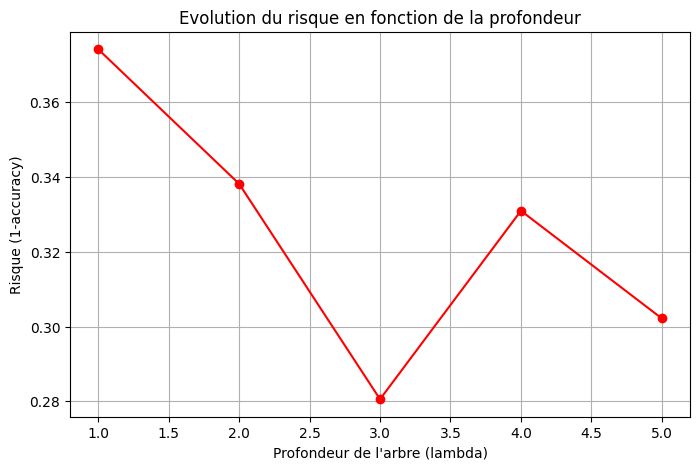

In [115]:
plt.figure(figsize = (8,5))
plt.plot(list(risques.keys()),list(risques.values()), marker ='o', linestyle ='-', color = 'r')
plt.xlabel("Profondeur de l\'arbre (lambda)")
plt.ylabel("Risque (1-accuracy)")
plt.title("Evolution du risque en fonction de la profondeur")
plt.grid(True)
plt.show()

avec risque est plus petit, on va choisir lanbda = 5

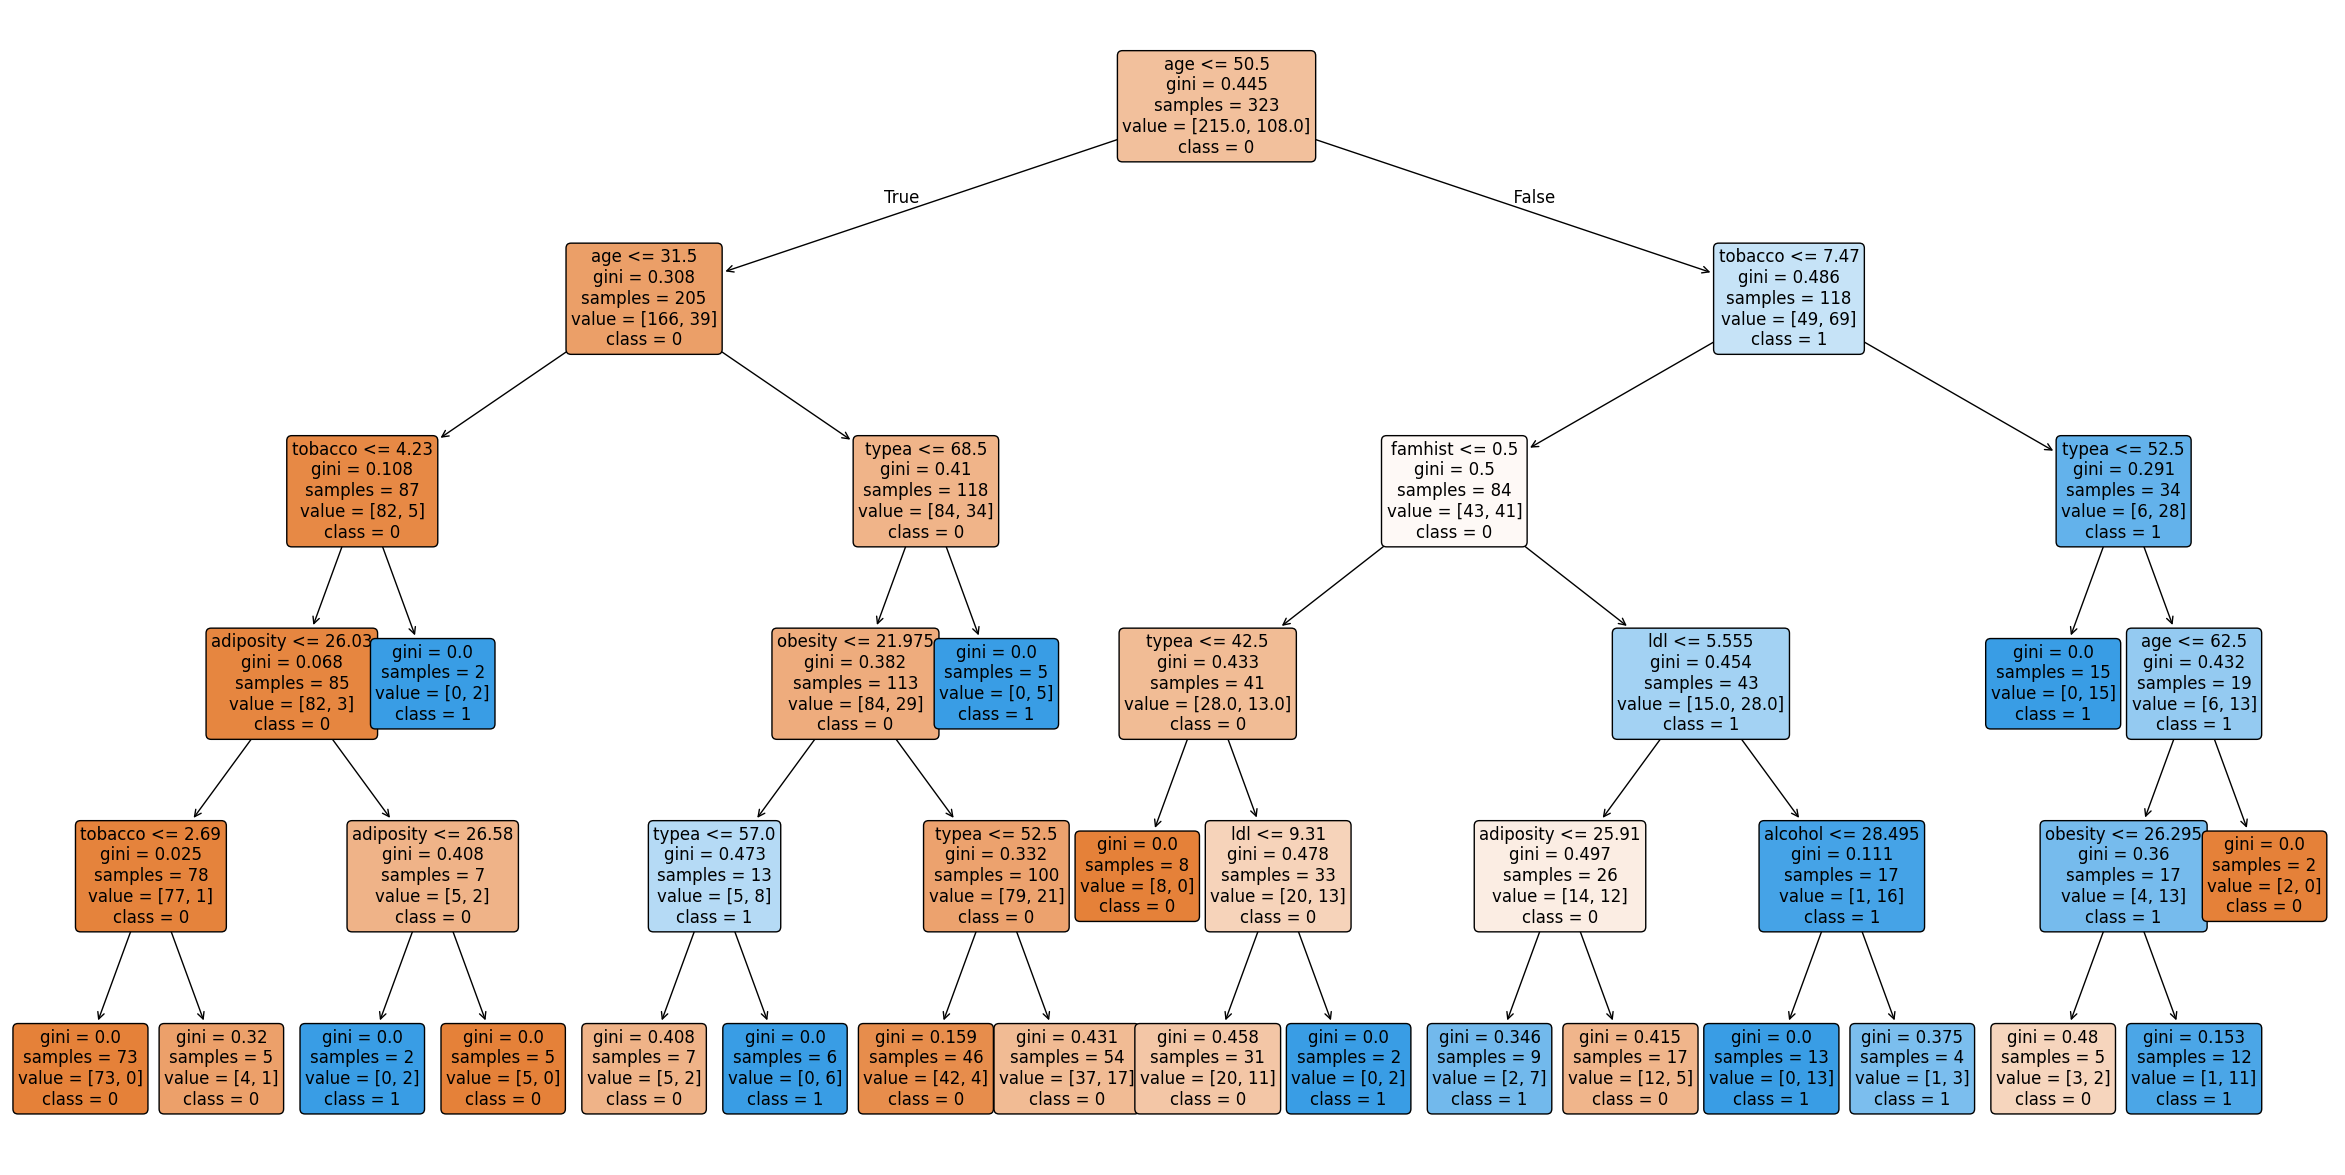

In [116]:
#Question 5
profond= 5
clf_5 = DecisionTreeClassifier(criterion = 'gini', max_depth = profond, random_state = 42)
clf_5.fit(X_train, Y_train)
class_name = [str(cls)for cls in clf_5.classes_] 
plt.figure(figsize = (30,15))
tree.plot_tree(clf_5,feature_names = X.columns, class_names = class_name ,filled =True, rounded = True, fontsize =12 )
plt.show()

In [117]:
#Question 6
#Validation croisée: (5-fold CV) done une estimation plus robuste du risque

Profondeur 1: Mean Accuracy = 0.6558, Estimated Risk = 0.3442
Profondeur 2: Mean Accuracy = 0.6506, Estimated Risk = 0.3494
Profondeur 3: Mean Accuracy = 0.6668, Estimated Risk = 0.3332
Profondeur 4: Mean Accuracy = 0.6261, Estimated Risk = 0.3739
Profondeur 5: Mean Accuracy = 0.6369, Estimated Risk = 0.3631


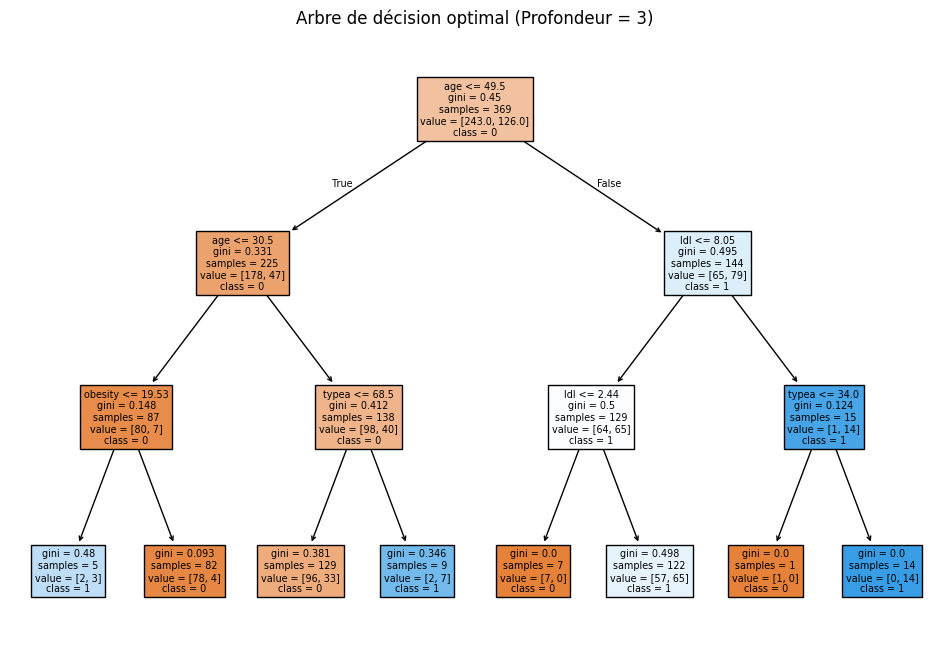

Risque estimé sur le jeu de test pour la profondeur optimale (3): 0.3333


In [118]:


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

best_depth = 0
best_risk = float('inf')
best_clf = None

# Ajustement et évaluation de l'arbre pour différentes profondeurs avec validation croisée
for depth in range(1,6):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv= None, scoring='accuracy')
    mean_accuracy = scores.mean()
    risk = 1 - mean_accuracy  # Calcul du risque moyen comme complément de l'accuracy moyenne
    print(f"Profondeur {depth}: Mean Accuracy = {mean_accuracy:.4f}, Estimated Risk = {risk:.4f}")
    
    if risk < best_risk:
        best_risk = risk
        best_depth = depth
        best_clf = clf

# Entraînement du meilleur modèle sur l'ensemble des données d'entraînement
best_clf.fit(X_train, y_train)

# Affichage de l'arbre de décision optimal
plt.figure(figsize=(12, 8))
tree.plot_tree(best_clf,feature_names = X.columns, class_names = class_name, filled=True)
plt.title(f"Arbre de décision optimal (Profondeur = {best_depth})")
plt.show()

# Estimation du risque final sur le jeu de test
y_test_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_risk = 1 - test_accuracy
print(f"Risque estimé sur le jeu de test pour la profondeur optimale ({best_depth}): {test_risk:.4f}")


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Estimation du risque
train_error = 1 - accuracy_score(y_train, clf.predict(X_train))
test_error = 1 - accuracy_score(y_test, clf.predict(X_test))

# Validation croisée
cv_scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
cv_error = 1 - cv_scores.mean()

print(f"Erreur d'entraînement : {train_error:.3f}")
print(f"Erreur de test : {test_error:.3f}")
print(f"Erreur de validation croisée : {cv_error:.3f}")

Erreur d'entraînement : 0.211
Erreur de test : 0.301
Erreur de validation croisée : 0.309
